In [1]:
import re                                                        
import os 
import pandas as pd
import numpy as np
from pandas import ExcelWriter
import matplotlib.pyplot as plt
%matplotlib inline
new_activ_dir = '/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/2.0_results/lda/lda_topic_unknown/'
os.chdir(new_activ_dir)


all_articles = pd.read_excel('all_articles_numerical_data.xlsx')
publication_keys = pd.read_excel('publication_keys.xlsx')

all_articles['topic'] = np.where(all_articles['topic']==24.1,24.0,all_articles['topic'] )
all_articles['topic'] = np.where(all_articles['topic']==22.1,30,all_articles['topic'] )
mapped_topic_buckets = pd.read_excel('12_themes_001.xlsx')
all_articles = pd.merge(all_articles, mapped_topic_buckets, on='topic')
all_articles= pd.merge(all_articles, publication_keys, on='publication')
#topic_file_topics = topic_file_topic['topic_bucket', 'topic_bucket_name']

cleaned_newsbody_31_topics = pd.read_excel('31_topics_cleaned_news_body.xlsx')
merge_df = cleaned_newsbody_31_topics[['doc_no', 'dateTime', 'newsbody_original']]
all_articles= pd.merge(all_articles, merge_df, on='doc_no')
topic_counts = all_articles.groupby(['topic_bucket','topic_bucket_name']).size().reset_index(name='counts')
topic_counts.sort_values(by = ['counts'], ascending= True)

,topic_bucket,topic_bucket_name,counts
10,11,aadhaar_and_money_laundering,233
5,6,aadhaar_and_financial_inclusion,449
9,10,aadhaar_legal_validity | right_to_privacy,607
11,12,aadhaar_related_crime | fake_card|misuse |resi...,748
8,9,aadhaar_act_money_bill_parliamentary_debates |...,818
3,4,aadhaar_enrolment process | centers | implemen...,942
7,8,aadhaar_and_privacy | data_breach |citizen_dat...,1042
0,1,aadhaar_targetted _delivery_of_subsidies| dire...,1278
2,3,aadhaar_digital_stack | entrepreneurship | inn...,1350
6,7,Macro_economic_policy | social_good | aadhaar_...,1887


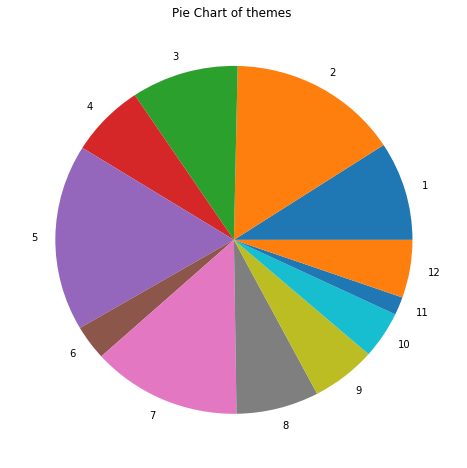

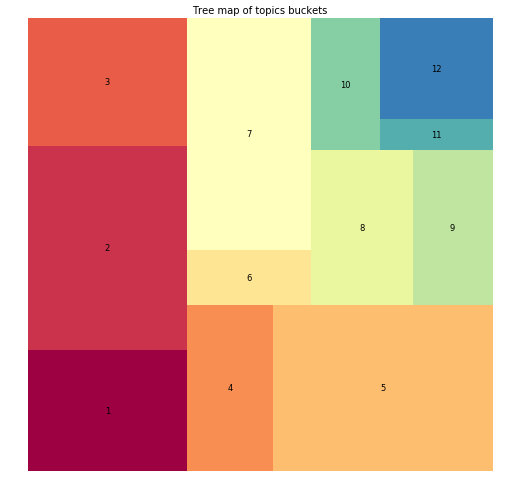

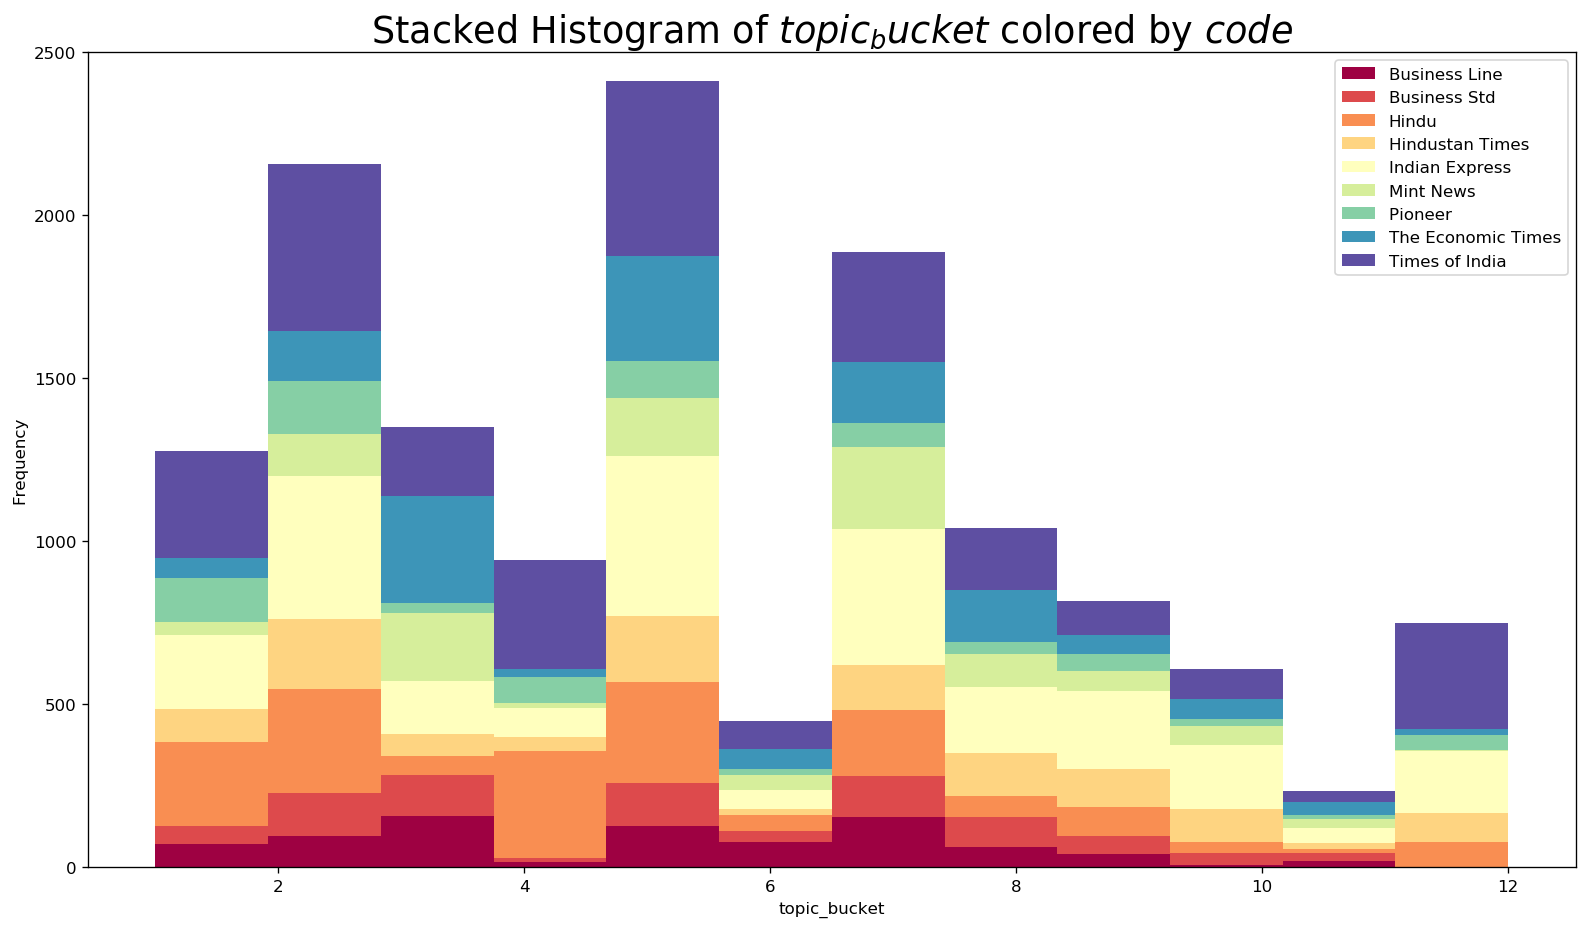

In [2]:
# Prepare Data 12 topic buckets
# Make the plot with pandas

topic_pie = topic_counts.copy()
topic_pie = topic_pie.set_index(['topic_bucket'])

topic_pie['counts'].plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of themes ")
plt.ylabel("")
plt.show()

# pip install squarify
import squarify 

# Import Data
df = topic_counts.copy()
# Prepare Data
labels = df.apply(lambda x: str(x[0]) , axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,10), dpi= 60)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=1)

# Decorate
plt.title('Tree map of topics buckets')
plt.axis('off')
plt.show()


# Import Data
df = all_articles.copy()

# Prepare data
x_var = 'topic_bucket'
groupby_var = 'code'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
# Draw
plt.figure(figsize=(16,9), dpi= 120)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 2500)
#plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()



In [22]:
tops = all_articles[['topic_bucket', 'topic_bucket_name']].copy()
tops.drop_duplicates(inplace=True)

writer = pd.ExcelWriter('tops.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
tops.to_excel(writer)
writer.save()
writer.close()

print(tops)



     topic_bucket                                  topic_bucket_name
0               1  aadhaar_targetted _delivery_of_subsidies| dire...
41              2  aadhaar_based_schemes | MNREGA | Rural empower...
99              4  aadhaar_enrolment process | centers | implemen...
111             6                    aadhaar_and_financial_inclusion
190             7  Macro_economic_policy | social_good | aadhaar_...
270             9  aadhaar_act_money_bill_parliamentary_debates |...
293             3  aadhaar_digital_stack | entrepreneurship | inn...
383             5  e_governance | link documents _pan_voter_id _l...
428             8  aadhaar_and_privacy | data_breach |citizen_dat...
810            11                       aadhaar_and_money_laundering
831            12  aadhaar_related_crime | fake_card|misuse |resi...
832            10          aadhaar_legal_validity | right_to_privacy


total_articles =  13922


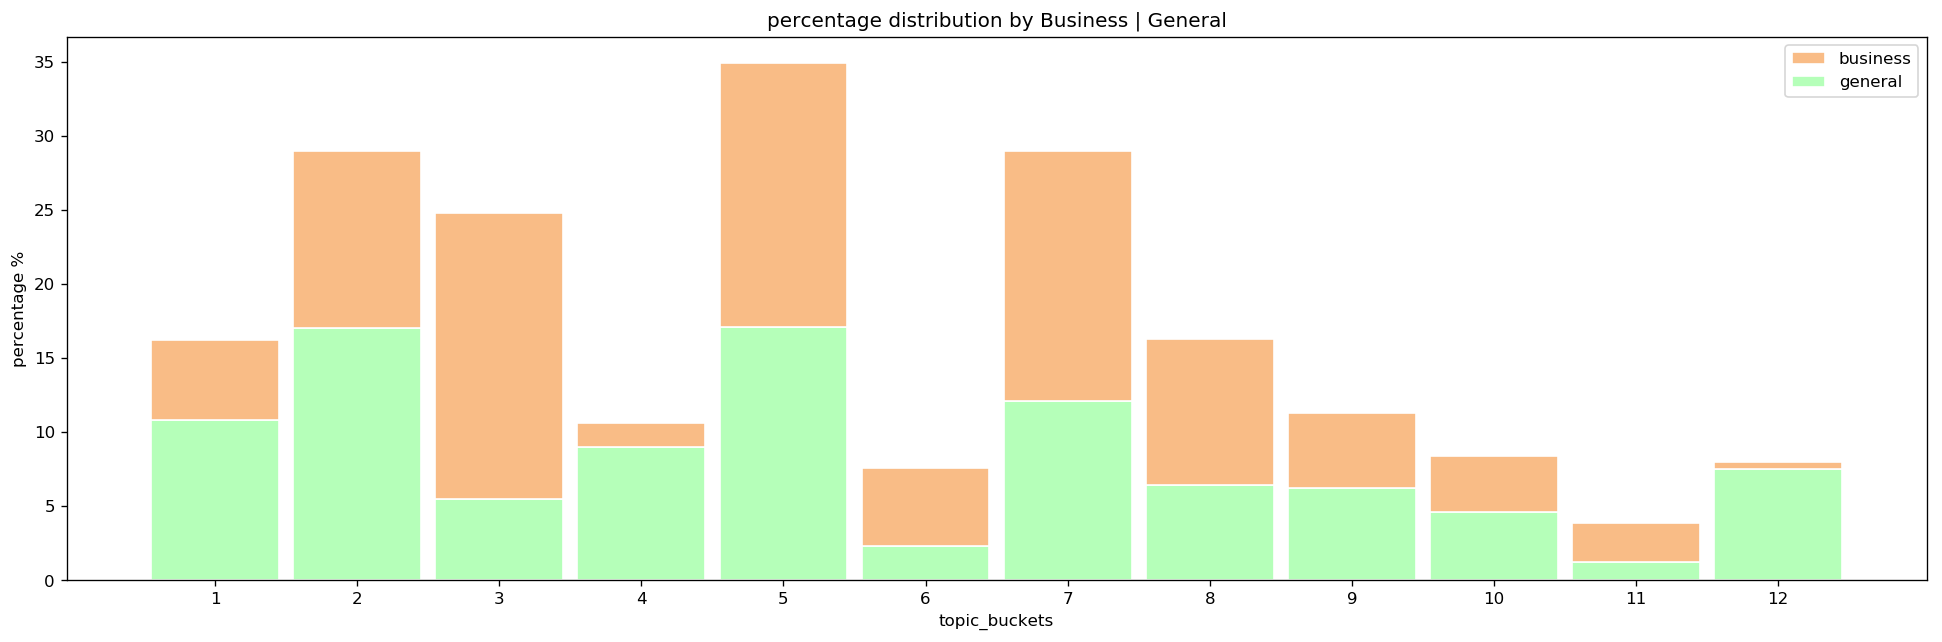

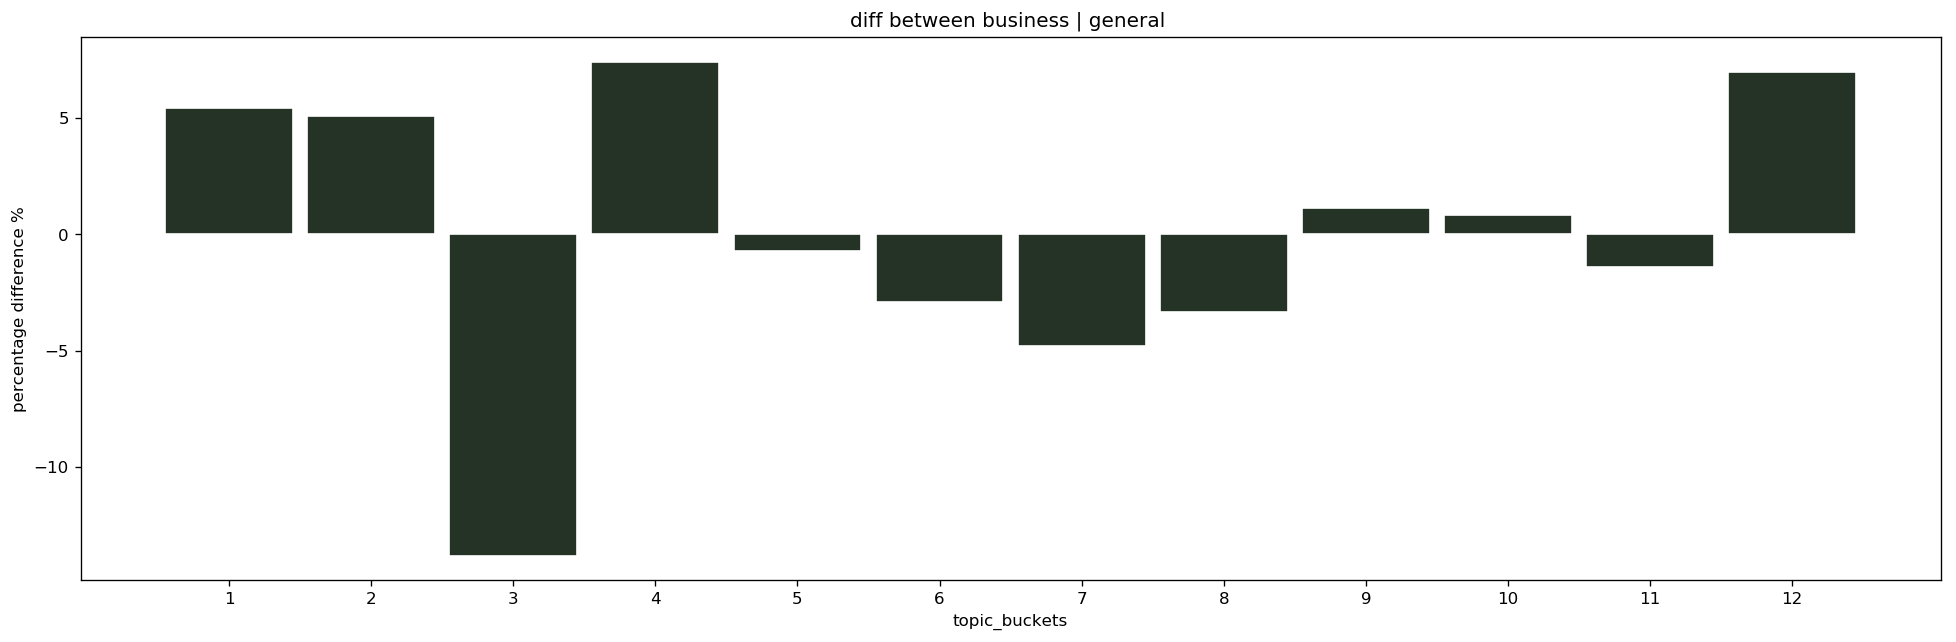

In [3]:
# business versus non business on topic buckets
df = all_articles.copy()

df['count_topics_by_type']=df.groupby(['type','topic_bucket'])['doc_no'].transform('count')
count_topics_by_type = df.pivot_table(index='topic_bucket', columns='type', values='count_topics_by_type',aggfunc=np.min)
count_topics_by_type 

# libraries

from matplotlib import rc
import numpy as np


r = [1,2,3,4,5,6,7,8,9,10,11,12]

# From raw value to percentage
totals_business = count_topics_by_type.business.sum()
totals_general = count_topics_by_type.general.sum()

business = [i / totals_business * 100 for i in count_topics_by_type['business']]
general  = [i / totals_general * 100 for i in count_topics_by_type['general']]

print( 'total_articles = ',totals_business + totals_general )

# plot
barWidth = 0.90
names = (1,2,3,4,5,6,7,8,9,10,11,12)
plt.figure(figsize=(20,6), dpi= 120)

# Create business Bars
p1= plt.bar(r, general, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create general Bars
p2=plt.bar(r, business, color='#f9bc86', edgecolor='white', width=barWidth, bottom=general)
 
# Custom x axis
plt.title('percentage distribution by Business | General')
plt.xticks(r, names)
plt.xlabel("topic_buckets")
plt.ylabel('percentage %')
plt.legend((p2[0], p1[0]), ( 'business','general'))

# Show graphic general
plt.show()

diff = []
enum = 0
while enum < len(general):
    dif = general[enum] - business[enum]
    diff.append(dif)
    enum = enum + 1
barWidth = 0.90
names = (1,2,3,4,5,6,7,8,9,10,11,12)
plt.figure(figsize=(20,6), dpi= 120)
p3= plt.bar(r, diff, color='#243325', edgecolor='white', width=barWidth)
plt.title('diff between business | general ')
plt.xticks(r, names)
plt.xlabel("topic_buckets")
plt.ylabel('percentage difference %')
plt.show()


total_articles =  13922


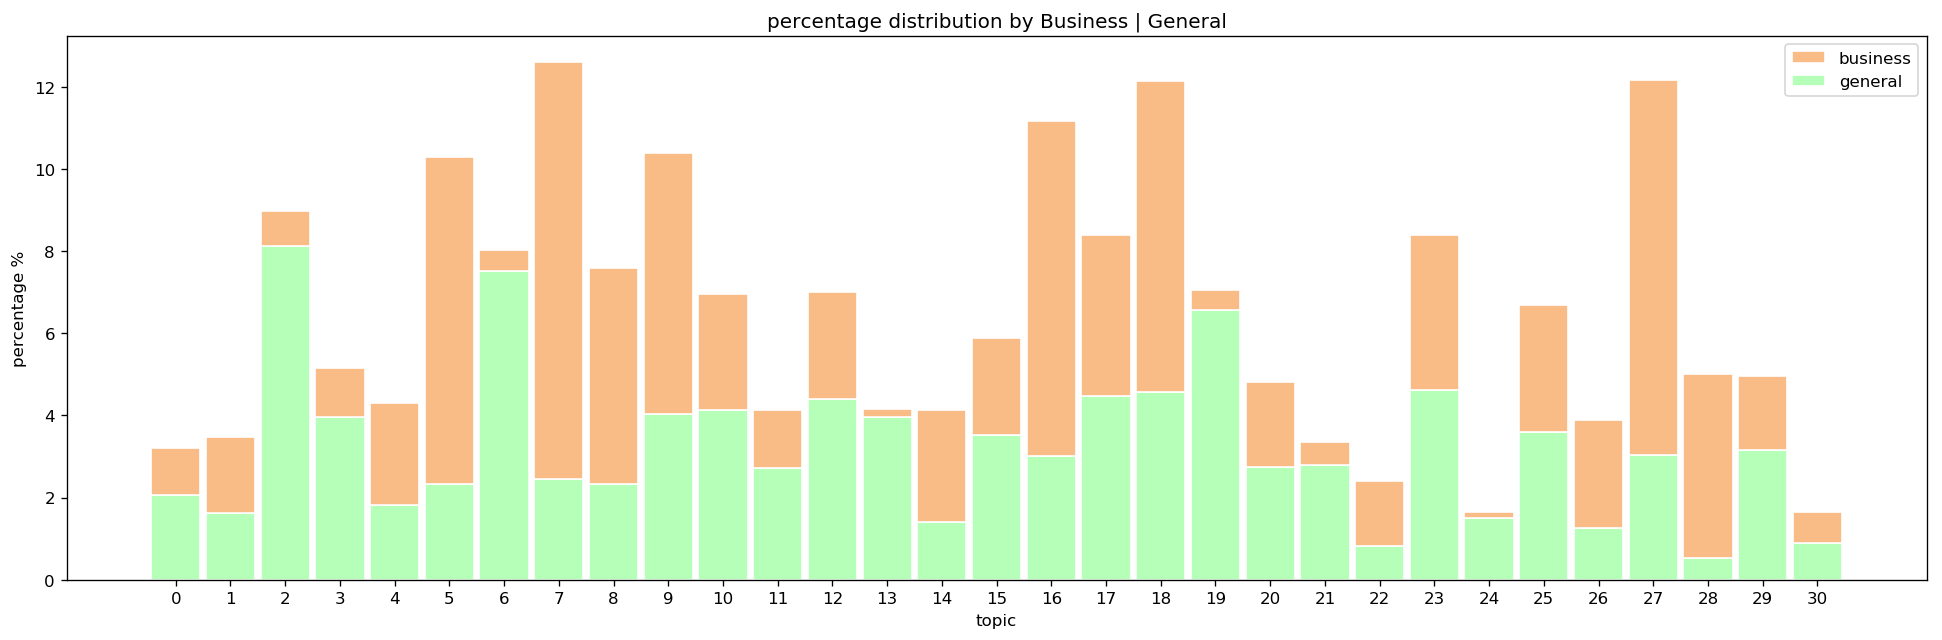

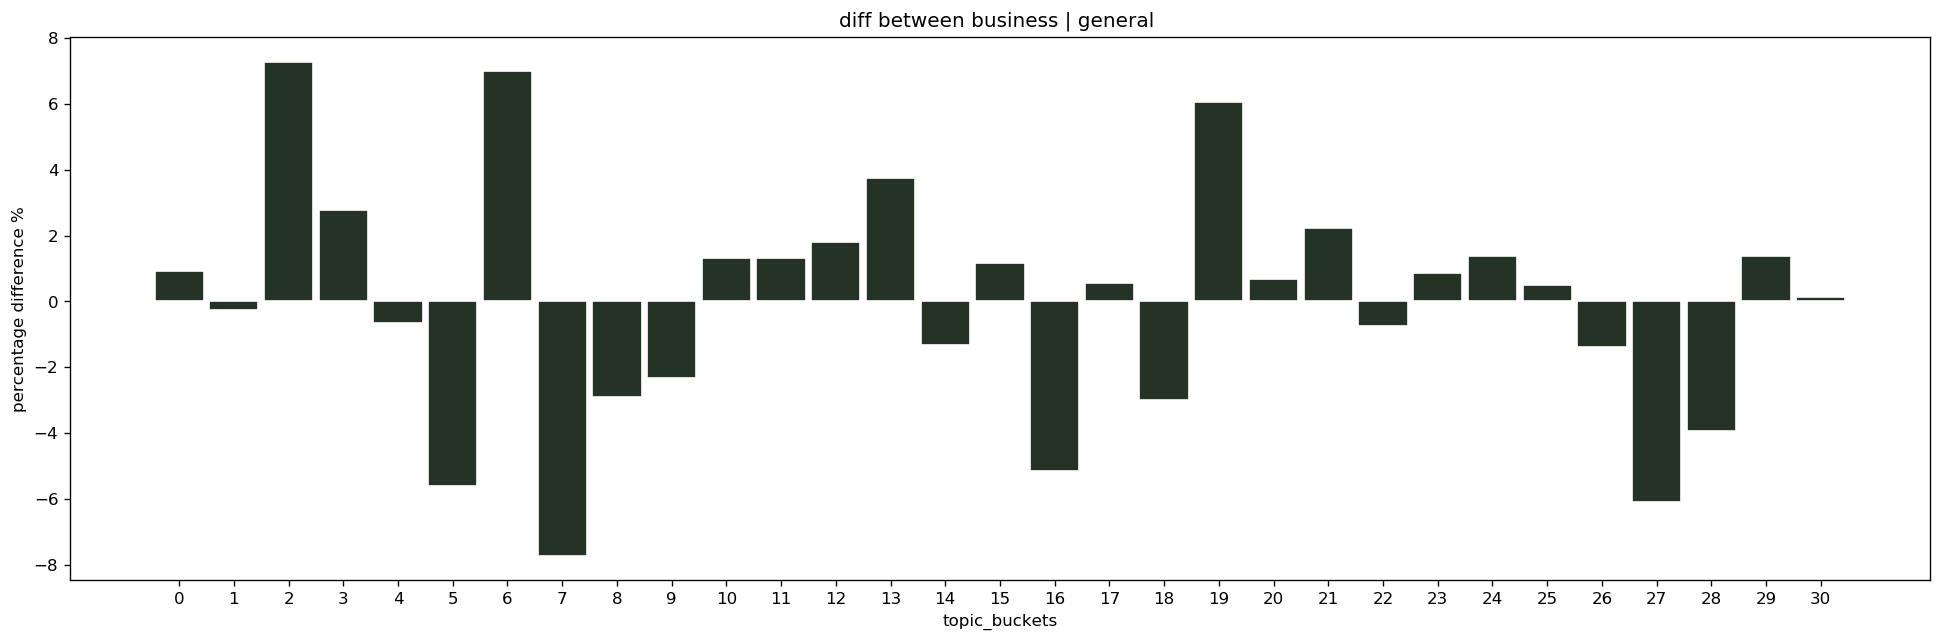

In [10]:
# business versus non business on topic buckets

df['count_original_topics_by_type']=df.groupby(['type','topic'])['doc_no'].transform('count')
count_original_topics_by_type = df.pivot_table(index='topic', columns='type', values='count_original_topics_by_type',aggfunc=np.min)

# libraries

from matplotlib import rc
import numpy as np


r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

# From raw value to percentage
totals_business = count_original_topics_by_type.business.sum()
totals_general = count_original_topics_by_type.general.sum()

business = [i / totals_business * 100 for i in count_original_topics_by_type['business']]
general  = [i / totals_general * 100 for i in count_original_topics_by_type['general']]

print( 'total_articles = ',totals_business + totals_general )

# plot
barWidth = 0.90
names = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30)


plt.figure(figsize=(20,6), dpi= 120)

# Create business Bars
p1= plt.bar(r, general, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create general Bars
p2=plt.bar(r, business, color='#f9bc86', edgecolor='white', width=barWidth, bottom=general)
 
# Custom x axis
plt.title('percentage distribution by Business | General')
plt.xticks(r, names)
plt.xlabel("topic")
plt.ylabel('percentage %')
plt.legend((p2[0], p1[0]), ( 'business','general'))

# Show graphic general
plt.show()

diff = []
enum = 0
while enum < len(general):
    dif = general[enum] - business[enum]
    diff.append(dif)
    enum = enum + 1
barWidth = 0.90
names = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30)
plt.figure(figsize=(20,6), dpi= 120)
p3= plt.bar(r, diff, color='#243325', edgecolor='white', width=barWidth)
plt.title('diff between business | general ')
plt.xticks(r, names)
plt.xlabel("topic_buckets")
plt.ylabel('percentage difference %')
plt.show()



In [9]:
df.topic.unique()

array([10., 18.,  2.,  8., 16.,  4.,  7., 25., 15.,  3.,  1., 27.,  5.,
        0.,  9., 12., 28., 29., 11., 21., 20., 24., 17., 30., 22., 14.,
       26.,  6., 23., 19., 13.])

In [11]:
##  plot topics by paper

df['count_topics_by_paper']=df.groupby(['code','topic_bucket'])['doc_no'].transform('count')
count_topics_by_paper = df.pivot_table(index='topic_bucket', columns='code', values='count_topics_by_paper',aggfunc=np.min)
count_topics_by_paper = count_topics_by_paper.T
count_topics_by_paper = (100*count_topics_by_paper.T / count_topics_by_paper.T.sum()).T
count_topics_by_paper = count_topics_by_paper.T

count_topics_by_paper.loc["Total"] = count_topics_by_paper.sum()

count_topics_by_paper.round(1)




code,Business Line,Business Std,Hindu,Hindustan Times,Indian Express,Mint News,Pioneer,The Economic Times,Times of India
topic_bucket,,,,,,,,,
1,8.6,6.6,14.3,8.2,8.2,3.6,17.1,4.3,10.6
2,11.4,16.1,17.7,17.4,15.9,11.5,20.9,10.3,16.6
3,18.8,15.2,3.4,5.3,5.9,18.7,3.8,22.3,6.8
4,2.1,1.5,18.1,3.6,3.2,1.2,10.3,1.6,10.8
5,15.2,16.0,17.2,16.2,17.8,16.0,14.6,21.7,17.4
6,9.4,4.2,2.6,1.6,2.0,4.4,2.0,4.1,2.8
7,18.4,15.4,11.2,11.2,15.1,22.4,9.6,12.7,10.9
8,7.5,11.2,3.7,10.5,7.3,9.3,4.6,10.7,6.2
9,5.0,6.8,4.8,9.6,8.6,5.3,6.6,4.0,3.4


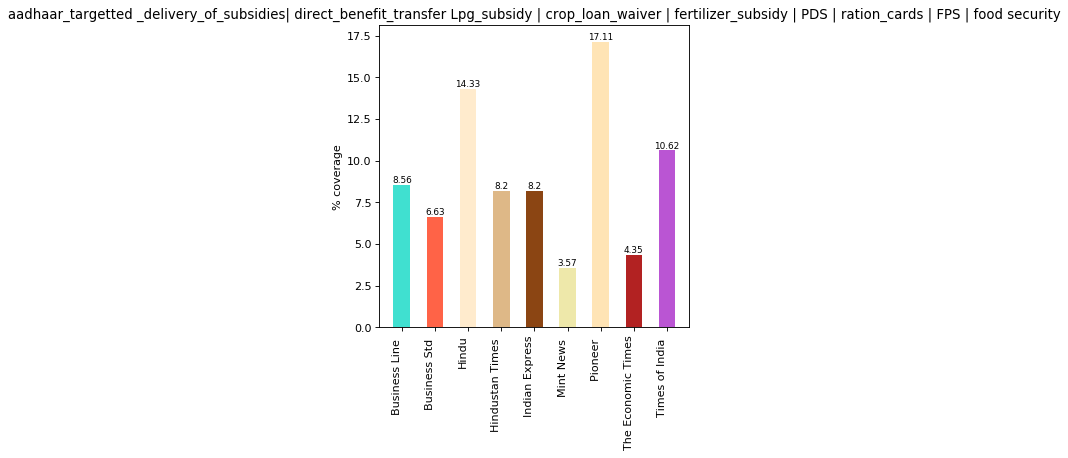

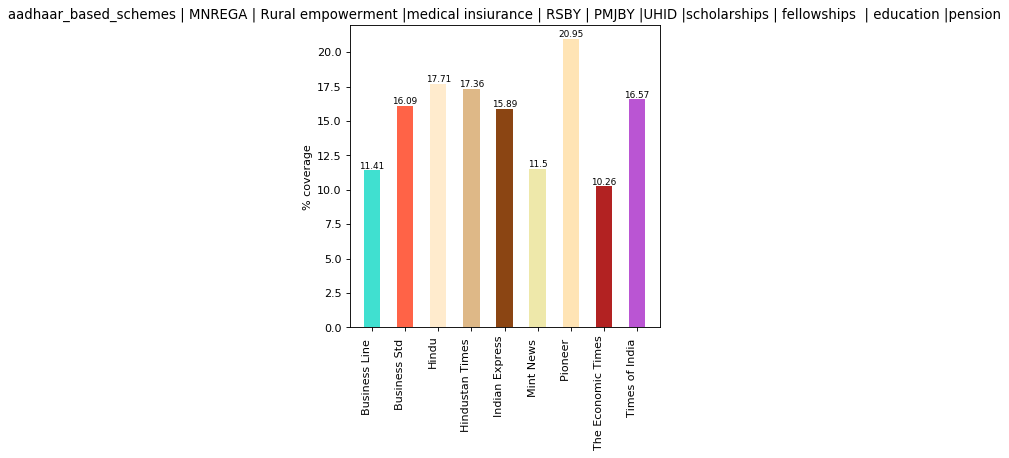

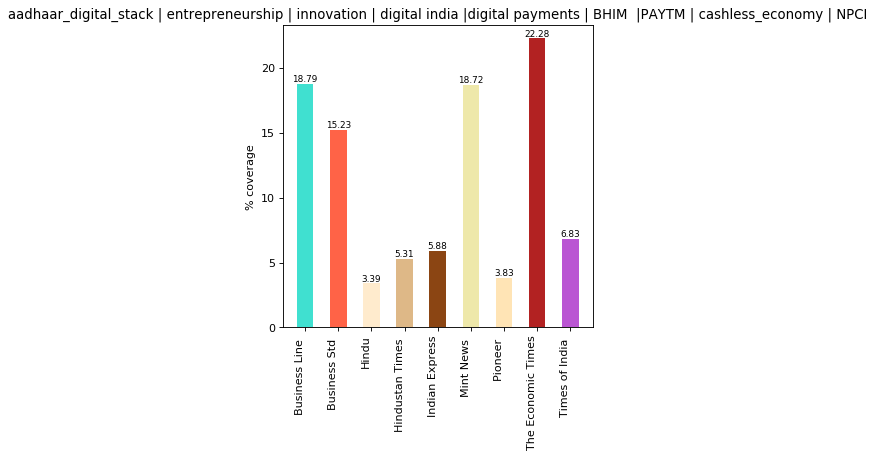

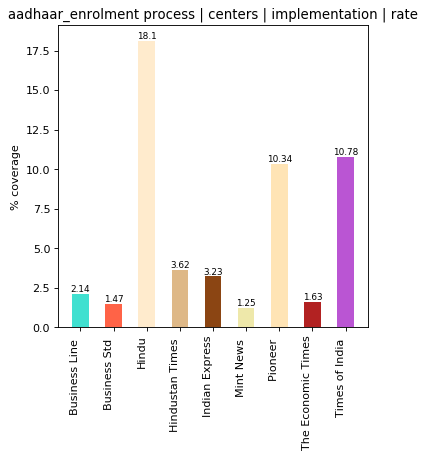

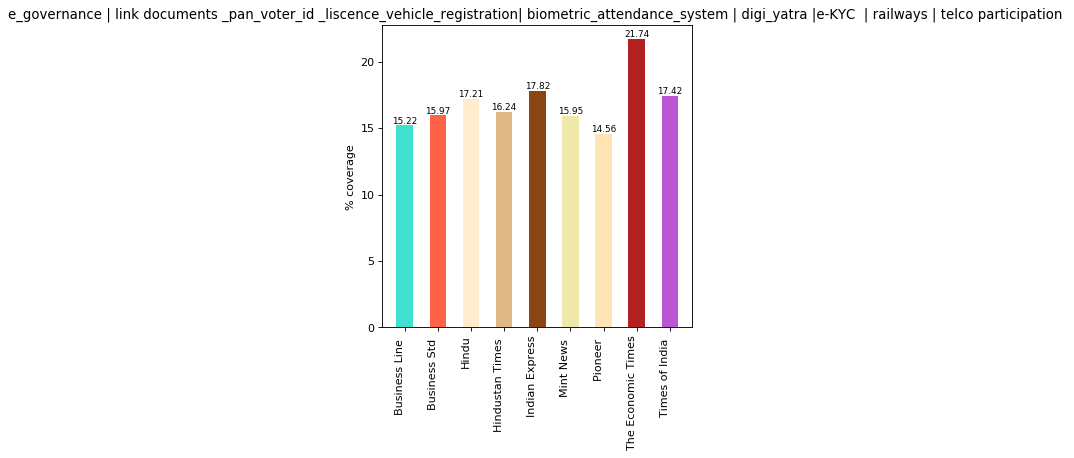

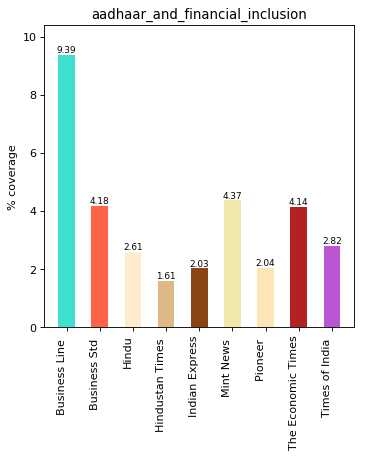

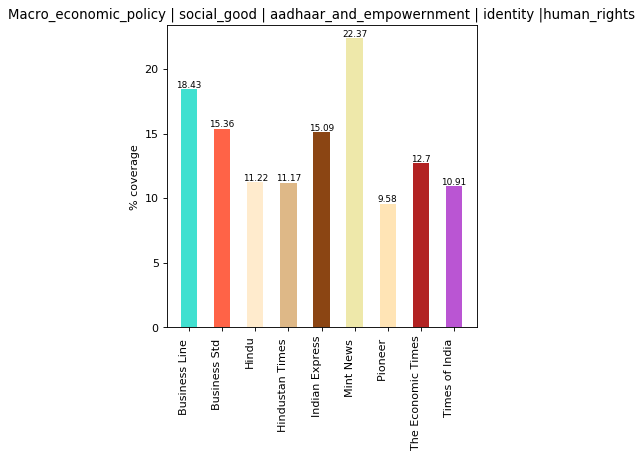

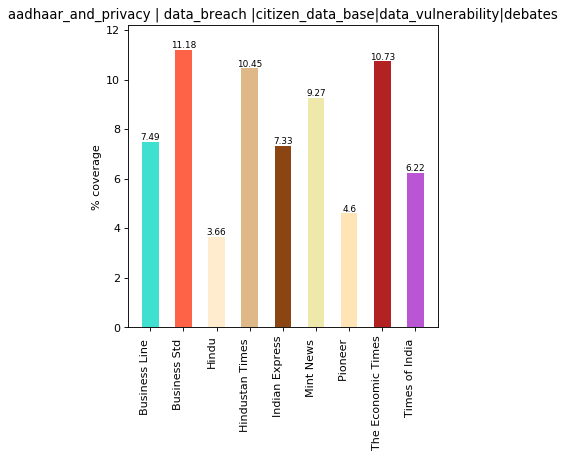

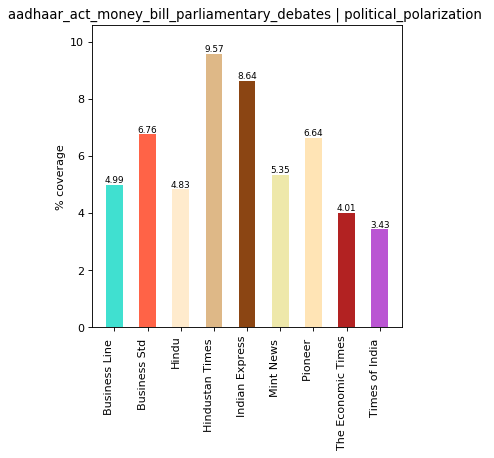

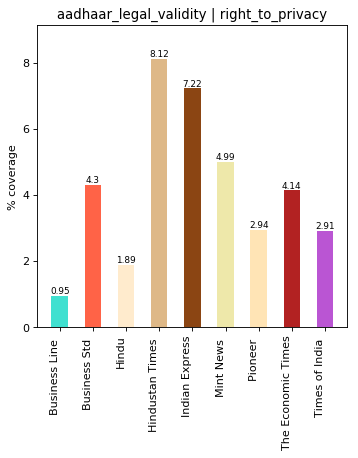

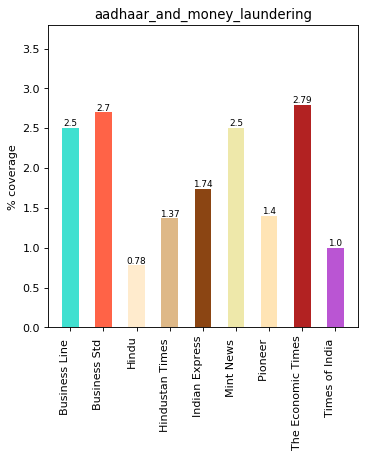

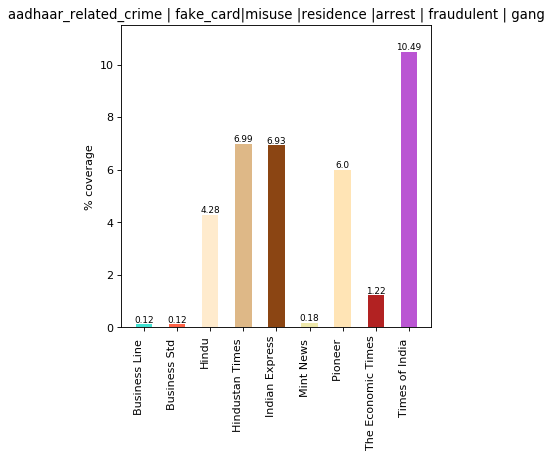

In [12]:
##  plot topic buckets by paper
import random
plot_topic = [1,2,3,4,5,6,7,8,9,10,11,12]
for topics in plot_topic:

    topic_name = df[df['topic_bucket'] ==topics]['topic_bucket_name'].unique()[0]
    # Import Data
    df_t = count_topics_by_paper.T
    df_t = pd.DataFrame(df_t[topics].copy().round(2)).reset_index()
    n = len(df_t['code']) + 1
    ymax = df_t[topics].max() + 1

    # Prepare Data
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(2)
    c = random.choices(all_colors, k=n)

    # Plot Bars
    plt.figure(figsize=(5,5), dpi= 80)
    plt.bar(df_t['code'], df_t[topics], color=c, width=.5)
    for i, val in enumerate(df_t[topics].values):
        plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':8})

    # Decoration
    plt.gca().set_xticklabels(df_t['code'], rotation=90, horizontalalignment= 'right')
    plt.title(topic_name, fontsize=12)
    plt.ylabel('% coverage')
    plt.ylim(0, ymax)
    plt.show()



In [399]:
df.head(n=2)

,doc_no,topic,publication,aadhaar_count,len_docs,article_length,year_quarter,original_topics,topic_html,topic_bucket,topic_bucket_name,code,type,dateTime,newsbody_original,count_topics_by_type,count_topics_by_paper,count_original_topics_by_type
0,1,10.0,1,1,231,500,2012.4,aadhaar_direct_benefit_transfer_LPG _subsidy,23,1,aadhaar_targetted _delivery_of_subsidies| dire...,Business Line,business,2012-11-06,After fixing an annual cap of six subsidised L...,230,72,120
1,18,10.0,1,4,112,258,2012.4,aadhaar_direct_benefit_transfer_LPG _subsidy,23,1,aadhaar_targetted _delivery_of_subsidies| dire...,Business Line,business,2012-12-12,To kick-start in 20 districts with 80% Aadhaar...,230,72,120


count    13922.000000
mean       473.642939
std        389.272204
min         17.000000
25%        272.000000
50%        382.000000
75%        544.000000
max       5437.000000
Name: article_length, dtype: float64

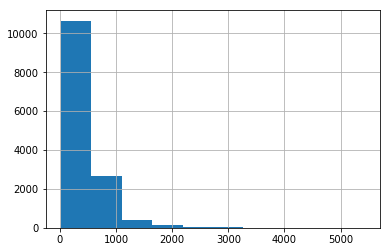

In [404]:
df['article_length'].hist()
df['article_length'].describe()

In [21]:
##  plot covered maximum in a quarter

df['count_topics_by_quarter']=df.groupby(['year_quarter','topic_bucket'])['doc_no'].transform('count')
count_topics_by_quarter = df.pivot_table(index='topic_bucket', columns='year_quarter', values='count_topics_by_quarter',aggfunc=np.max)
count_topics_by_quarter = count_topics_by_quarter.T

count_topics_by_quarter.round(0)
count_topics_by_quarter.fillna(0,inplace=True)

writer = pd.ExcelWriter('count_topics_by_quarter.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
count_topics_by_quarter.to_excel(writer)
writer.save()
writer.close()

count_topics_by_quarter



topic_bucket,1,2,3,4,5,6,7,8,9,10,11,12
year_quarter,,,,,,,,,,,,
2012.4,29.0,183.0,22.0,52.0,37.0,22.0,50.0,14.0,11.0,3.0,0.0,5.0
2013.1,30.0,137.0,18.0,82.0,33.0,12.0,56.0,17.0,24.0,3.0,4.0,7.0
2013.2,40.0,69.0,4.0,30.0,37.0,4.0,25.0,9.0,7.0,0.0,1.0,2.0
2013.3,67.0,29.0,4.0,41.0,23.0,12.0,19.0,6.0,12.0,2.0,1.0,5.0
2013.4,89.0,32.0,29.0,38.0,47.0,10.0,43.0,14.0,18.0,15.0,0.0,2.0
2014.1,118.0,56.0,20.0,36.0,42.0,25.0,56.0,24.0,76.0,10.0,1.0,14.0
2014.2,14.0,18.0,6.0,14.0,30.0,4.0,26.0,11.0,21.0,1.0,0.0,6.0
2014.3,26.0,45.0,8.0,19.0,22.0,27.0,39.0,7.0,10.0,0.0,1.0,5.0
2014.4,109.0,83.0,34.0,53.0,83.0,22.0,58.0,13.0,14.0,1.0,5.0,17.0


In [25]:
writer = pd.ExcelWriter('final_all_article_data.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
all_articles.to_excel(writer)
writer.save()
writer.close()


113